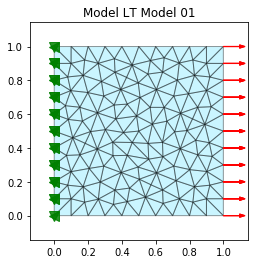

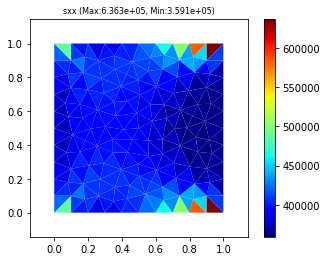

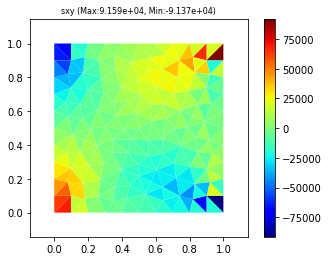

In [4]:
from nusa import *
import nusa.mesh as nmsh

md = nmsh.Modeler()
BB, ES = 1, 0.1
a = md.add_rectangle((0,0),(BB,BB), esize=ES)
nc, ec = md.generate_mesh()
x,y = nc[:,0], nc[:,1]

nodos = []
elementos = []

for k,nd in enumerate(nc):
    cn = Node((x[k],y[k]))
    nodos.append(cn)
    
for k,elm in enumerate(ec):
    i,j,m = int(elm[0]),int(elm[1]),int(elm[2])
    ni,nj,nm = nodos[i],nodos[j],nodos[m]
    ce = LinearTriangle((ni,nj,nm),200e9,0.3,0.25)
    elementos.append(ce)

m = LinearTriangleModel()
for node in nodos: m.add_node(node)
for elm in elementos: m.add_element(elm)
    
# Aplicando condiciones de frontera en los extremos
minx, maxx = min(x), max(x)
miny, maxy = min(y), max(y)

P = 100e3/((BB/ES)+1)

for node in nodos:
    if node.x == minx:
        m.add_constraint(node, ux=0, uy=0)
    if node.x == maxx:
        m.add_force(node, (P,0))

m.plot_model()
m.solve()
m.plot_esol("sxx")
m.plot_esol("sxx")